In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from adjustText import adjust_text

In [94]:
COLORS1 = {'ARI': '#97233f','ATL': '#a71930','BAL': '#241773','BUF': '#00338d',
           'CAR': '#0085ca','CHI': '#0b162a','CIN': '#000000','CLE': '#fb4f14',
           'DAL': '#002244','DEN': '#002244','DET': '#005a8b','GB': '#203731',
           'HOU': '#03202f','IND': '#002c5f','JAX': '#000000','KC': '#e31837',
           'LA': '#002244','LAC': '#002244','LAR': '#002244','LV': '#a5acaf',
           'MIA': '#008e97','MIN': '#4f2683','NE': '#002244','NO': '#9f8958',
           'NYG': '#0b2265','NYJ': '#203731','OAK': '#a5acaf','PHI': '#004953',
           'PIT': '#000000','SD': '#002244','SEA': '#002244','SF': '#aa0000',
           'STL': '#002244','TB': '#d50a0a','TEN': '#002244','WAS': '#773141'}

COLORS2 = {'ARI': '#000000','ATL': '#000000','BAL': '#000000','BUF': '#c60c30',
          'CAR': '#000000','CHI': '#c83803','CIN': '#fb4f14','CLE': '#22150c',
          'DAL': '#b0b7bc','DEN': '#fb4f14','DET': '#b0b7bc','GB': '#ffb612',
          'HOU': '#a71930','IND': '#a5acaf','JAX': '#006778','KC': '#ffb612',
           'LA': '#b3995d','LAC': '#0073cf','LAR': '#b3995d','LV': '#000000',
           'MIA': '#f58220','MIN': '#ffc62f','NE': '#c60c30','NO': '#000000',
           'NYG': '#a71930','NYJ': '#1c2d25','OAK': '#000000','PHI': '#a5acaf',
           'PIT': '#ffb612','SD': '#0073cf','SEA': '#69be28','SF': '#b3995d',
           'STL': '#b3995d','TB': '#34302b','TEN': '#4b92db','WAS': '#ffb612'}

In [95]:
df = pd.read_csv('https://raw.githubusercontent.com/michaelegle/TurnoverTrain/main/secondary.csv')

df['color1'] = df['team'].map(COLORS1)
df['color2'] = df['team'].map(COLORS2)

In [96]:
df1 = pd.read_csv('https://raw.githubusercontent.com/michaelegle/TurnoverTrain/main/xcomp_vals.csv')

df1 = df1.rename(columns={'closest':'name'})

df1['color1'] = df1['team'].map(COLORS1)
df1['color2'] = df1['team'].map(COLORS2)

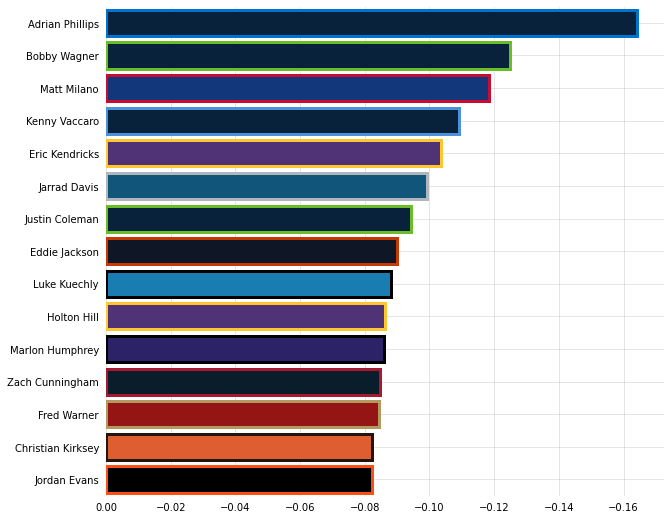

In [97]:
df = df.loc[df.targets>=20].reset_index().head(15)

fig, ax = plt.subplots(figsize=(10,9))

sns.barplot(x='tCPOE',y='name',data=df,palette=df.color1, edgecolor = df.color2)

ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
plt.setp(ax.patches, linewidth=3)
plt.gca().invert_xaxis()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(left=False)
plt.tick_params(bottom=False)

#plt.savefig('tcpoe.png',dpi=300, bbox_inches='tight')

In [98]:
df1 = df1.loc[df1.frames>=5000].reset_index()
df1cb = df1.loc[(df1.pos_category=='CB')].sort_values(by='xcomp').head(15)
df1lb = df1.loc[(df1.pos_category=='LB')].sort_values(by='xcomp').head(15)
df1s = df1.loc[(df1.pos_category=='S')].sort_values(by='xcomp').head(15)

Text(0, 0.5, '')

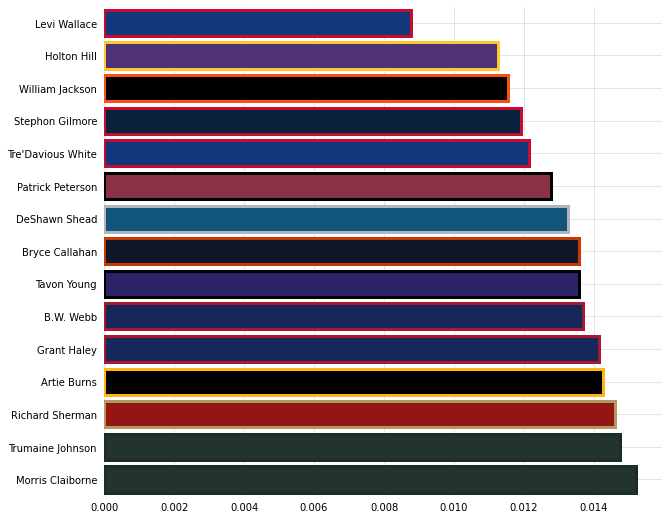

In [99]:
fig, ax = plt.subplots(figsize=(10,9))

sns.barplot(x='xcomp',y='name',data=df1cb,palette=df1cb.color1, edgecolor = df1cb.color2)

ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
plt.setp(ax.patches, linewidth=3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(left=False)
plt.tick_params(bottom=False)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('cbxcomp',dpi=300,bbox_inches='tight')

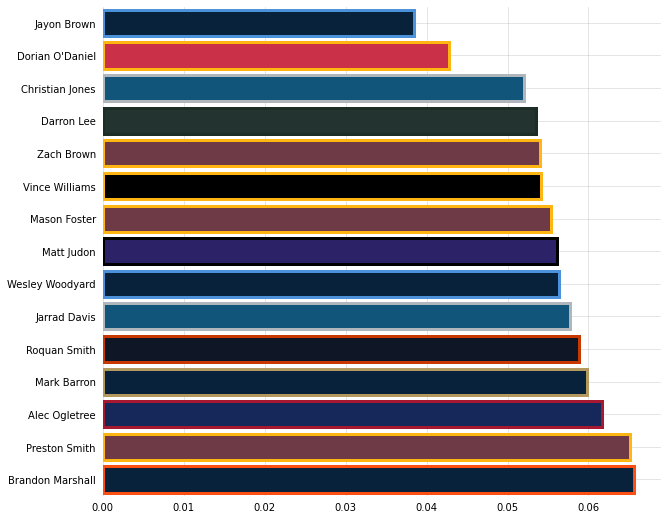

In [100]:
fig, ax = plt.subplots(figsize=(10,9))

sns.barplot(x='xcomp',y='name',data=df1lb,palette=df1lb.color1, edgecolor = df1lb.color2)

ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
plt.setp(ax.patches, linewidth=3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(left=False)
plt.tick_params(bottom=False)
#plt.savefig('lbxcomp',dpi=300,bbox_inches='tight')

Text(0, 0.5, '')

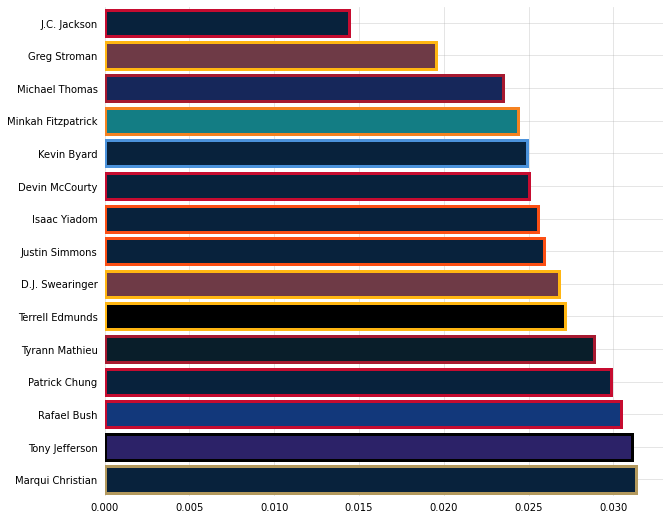

In [101]:
fig, ax = plt.subplots(figsize=(10,9))

sns.barplot(x='xcomp',y='name',data=df1s,palette=df1s.color1, edgecolor = df1s.color2)

ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
plt.setp(ax.patches, linewidth=3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(left=False)
plt.tick_params(bottom=False)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('sxcomp',dpi=300,bbox_inches='tight')

In [106]:
df1 = pd.read_csv('https://raw.githubusercontent.com/michaelegle/TurnoverTrain/main/xcomp_vals.csv')
df1 = df1.rename(columns={'closest':'name'})

df = pd.read_csv('https://raw.githubusercontent.com/michaelegle/TurnoverTrain/main/secondary.csv')

merged = pd.merge(df,df1,on='name')
pos = ['LB','S', 'CB']
merged = merged.loc[merged.pos_category.isin(pos) & (merged.frames>=5000)]

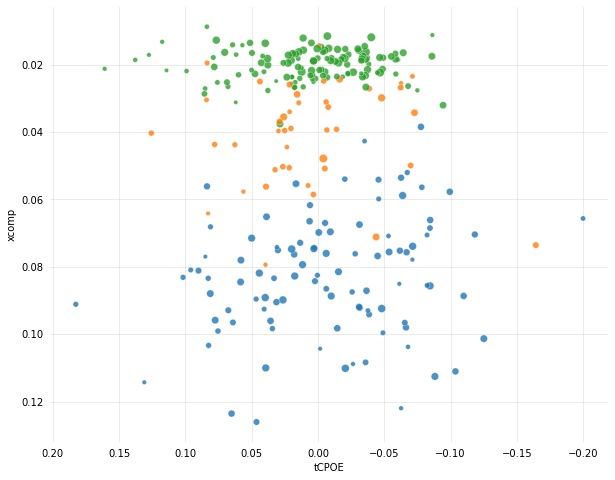

In [107]:
fig,ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x='tCPOE',y='xcomp',data=merged, hue='pos_category',size='snaps',alpha=0.8)

ax.invert_xaxis()
ax.invert_yaxis()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(zorder=0,alpha=.3)
ax.set_axisbelow(True)
plt.tick_params(left=False)
plt.tick_params(bottom=False)
ax.get_legend().remove()
#plt.savefig('xcomp_tcpoe.png',dpi=300,bbox_inches='tight')

In [73]:
labs = ['Bobby Wagner','Luke Kuechly','Marlon Humphrey','Patrick Peterson','Adrian Phillips','Minkah Fitzpatrick']

In [74]:
labs = merged.loc[merged.name.isin(labs)]

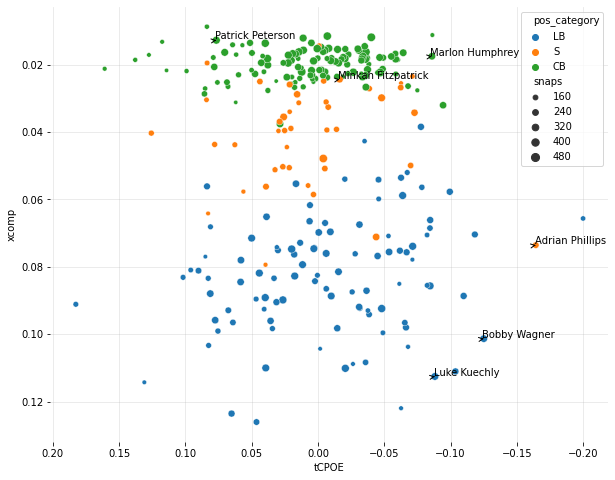

In [85]:
fig,ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x='tCPOE',y='xcomp',data=merged, hue='pos_category',size='snaps')

texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    labs.tCPOE, labs.xcomp, labs.name)]

adjust_text(texts,autoalign=True,arrowprops=dict(arrowstyle='->', color='black'))


ax.invert_xaxis()
ax.invert_yaxis()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(zorder=0,alpha=.3)
ax.set_axisbelow(True)
#plt.savefig('labs.png',dpi=300,bbox_inches='tight')